# Домашнее задание по курсу Методы прецизионных измерений в спутниковой навигации  (МПИСРНС)
# Кузищин Дмитрий РЛ1-112
# Вариант №7

In [1]:
import numpy as np
import math as mt
import matplotlib.pyplot as plt
import scipy. interpolate

# 1. Начальный данные

In [2]:
x = 7780917.08181935
y = 10587811.7318081
H = 200

a_sc42 = 6378245 # СК-42
b_sc42 = 6356863 # СК-42

a_wgs84 = 6378137        # WGS-84
b_wgs84 = 6356752.3142   # WGS-84

# 2. Используемые функции

In [3]:
def rectangularRefToGeodetic(x, y):
    n = int(y * 1e-6)
    beta = x / 6367558.4968
    B0 = beta + np.sin(2*beta) * (0.00252588685 - 0.00001491860 * mt.pow(np.sin(beta),2) + \
                                  0.00000011904 * mt.pow(np.sin(beta),4))
    z0 = (y - (10*n + 5) * 1e+5) / (6378245 * np.cos(B0))
    
    l = -mt.pow(z0,2) * (0.0038 + 0.0524*mt.pow(np.sin(B0),2) + 0.0482*mt.pow(np.sin(B0),4) - \
                         0.0032*mt.pow(np.sin(B0),6))
    l = -mt.pow(z0,2) * (0.01225 + 0.09477*mt.pow(np.sin(B0),2) + 0.03282*mt.pow(np.sin(B0),4) - \
                         0.00034*mt.pow(np.sin(B0),6) + l)
    l = -mt.pow(z0,2) * (0.0420025 + 0.1487407*mt.pow(np.sin(B0),2) + 0.0059420*mt.pow(np.sin(B0),4) - \
                         0.0000150*mt.pow(np.sin(B0),6) + l)
    l = -mt.pow(z0,2) * (0.16778975 + 0.16273586*mt.pow(np.sin(B0),2) - 0.00052490*mt.pow(np.sin(B0),4) - \
                         0.00000846*mt.pow(np.sin(B0),6) + l)
    l = z0 * (1 - 0.0033467108*mt.pow(np.sin(B0),2) - 0.0000056002*mt.pow(np.sin(B0),4) - \
              0.0000000187*mt.pow(np.sin(B0),6) + l)
    
    dB = -mt.pow(z0,2) * (0.01672 - 0.00630*mt.pow(np.sin(B0),2) + 0.01188*mt.pow(np.sin(B0),4) + \
                          0.00328*mt.pow(np.sin(B0),6))
    dB = -mt.pow(z0,2) * (0.042858 - 0.025318*mt.pow(np.sin(B0),2) + 0.014346*mt.pow(np.sin(B0),4) - \
                          0.001264*mt.pow(np.sin(B0),6) + dB)
    dB = -mt.pow(z0,2) * (0.10500614 - 0.04559916*mt.pow(np.sin(B0),2) + 0.00228901*mt.pow(np.sin(B0),4) - \
                          0.00002987*mt.pow(np.sin(B0),6) + dB)
    dB = -mt.pow(z0,2) * np.sin(2*B0) * (0.251684631 - 0.003369263*mt.pow(np.sin(B0),2) + \
                                         0.00001127*mt.pow(np.sin(B0),4) + dB)
    
    B = B0 + dB
    L = 6 * (n - 0.5) / 57.29577951 + l
    
    return [B, L]

In [4]:
def geodeticToRectangularRef(B, L):
    L = L / np.pi * 180
    n = int((6 + L) / 6)
    l = (L - (3 + 6 * (n-1))) / 57.29577951
    
    x = mt.pow(l,2) * (109500 - 574700*mt.pow(np.sin(B),2) + 863700*mt.pow(np.sin(B),4) \
                       - 398600*mt.pow(np.sin(B),6))
    x = mt.pow(l,2) * (278194 - 830174*mt.pow(np.sin(B),2) + 572434*mt.pow(np.sin(B),4) \
                       - 16010*mt.pow(np.sin(B),6) + x)
    x = mt.pow(l,2) * (672483.4 - 811219.9*mt.pow(np.sin(B),2) + 5420.0*mt.pow(np.sin(B),4) \
                       - 10.6*mt.pow(np.sin(B),6) + x)
    x = -mt.pow(l,2) * (1594561.25 + 5336.535*mt.pow(np.sin(B),2) + 26.790*mt.pow(np.sin(B),4) \
                        + 0.149*mt.pow(np.sin(B),6) + x)
    x = 6367558.4968 * B - np.sin(2*B) * (16002.8900 + 66.9607*mt.pow(np.sin(B),2) \
                                             + 0.3515*mt.pow(np.sin(B),4) + x)
    
    y = mt.pow(l,2) * (79690 - 866190*mt.pow(np.sin(B),2) + 1730360*mt.pow(np.sin(B),4) \
                       - 945460*mt.pow(np.sin(B),6))
    y = mt.pow(l,2) * (270806 - 1523417*mt.pow(np.sin(B),2) + 1327645*mt.pow(np.sin(B),4) \
                       - 21701*mt.pow(np.sin(B),6) + y)
    y = mt.pow(l,2) * (1070204.16 - 2136826.66*mt.pow(np.sin(B),2) + 17.98*mt.pow(np.sin(B),4) \
                       - 11.99*mt.pow(np.sin(B),6) + y)
    y = (5 + 10 * n) * 1e+5 + l * np.cos(B) * (6378245 + 21346.1415*mt.pow(np.sin(B),2) + \
                       107.1590*mt.pow(np.sin(B),4) + 0.5977*mt.pow(np.sin(B),6) + y)
    
    return [x, y]

In [5]:
def geodeticToGeocentric(B, L, H, a, b):
    alfa = (a - b)/a
    e_sqr = 2 * alfa -  mt.pow(alfa, 2)
    N = a / mt.sqrt(1 - e_sqr * np.power(np.sin(B),2))
    X = (N + H) * np.cos(B) * np.cos(L)
    Y = (N + H) * np.cos(B) * np.sin(L)
    Z = ((1 - e_sqr) * N + H) * np.sin(B)
    return [X, Y, Z]

In [6]:
def geocentricToGeodetic(X, Y, Z, a, b):
    
    alfa = (a - b)/a
    e_sqr = 2 * alfa -  mt.pow(alfa, 2)
    
    D = mt.sqrt(mt.pow(X,2) + mt.pow(Y,2))
    if(D == 0):
        B = np.pi/2 * (Z/np.abs(Z)) 
        L = 0
        H = Z * np.sin(B) - a * mt.sqrt(1-e_sqr * mt.pow(np.sin(B),2))
    else:
        La = np.abs(np.arcsin(Y/D))
        if(Y < 0 and X > 0):
            L = 2 * np.pi - La
        elif(Y < 0 and X < 0):
            L = np.pi + La
        elif(Y > 0 and X < 0):
            L = np.pi - La
        elif(Y > 0 and X > 0):
            L = La
        elif(Y == 0 and X > 0):
            L = 0
        elif(Y == 0 and X < 0):
            L = np.pi
            
        if(Z == 0):
            B = 0
            H = D - a
        else:
            r = mt.sqrt(np.power(X,2) + np.power(Y,2) + np.power(Z,2))
            c = np.arcsin(Z/r)
            p = (e_sqr * a) / (2 * r)
            d = 1e-8
            s1 = 0
            s2 = 10
            
            while(d < np.abs(s2 - s1)):
                if(s2 != 10):
                    s1 = s2
                b = c + s1
                s2 = np.arcsin((p * np.sin(2*b)) / mt.sqrt(1 - e_sqr * np.power(np.sin(b),2)))
                
            B = b
            H = D * np.cos(B) + Z * np.sin(B) - a * mt.sqrt(1 - e_sqr * np.power(np.sin(B),2))
            
    return [B, L, H]

In [7]:
def sc42ToPz90(x, y, z):
    dx = 23.557
    dy = -140.844
    dz = -79.778
    w_z = 3.850439e-6
    w_y = 1.679685e-6
    w_x = 1.115071e-8
    m = -0.228e-6
    
    matTransform = np.array([[1, -w_z, w_y], [w_z, 1, -w_x], [-w_y, w_x, 1]])
    matCoords = np.array([[x], [y], [z]])
    matErrors = np.array([[dx], [dy], [dz]])
    matResult = (1 + m) * matTransform.dot(matCoords) + matErrors

    return np.reshape(matResult, 3)

In [8]:
def pz90ToSc42(x, y, z):
    dx = 23.557
    dy = -140.844
    dz = -79.778
    w_z = 3.850439e-6
    w_y = 1.679685e-6
    w_x = 1.115071e-8
    m = -0.228e-6
    
    matTransform = np.array([[1, w_z, -w_y], [-w_z, 1, w_x], [w_y, -w_x, 1]])
    matCoords = np.array([[x], [y], [z]])
    matErrors = np.array([[dx], [dy], [dz]])
    matResult = (1 - m) * matTransform.dot(matCoords) - matErrors

    return np.reshape(matResult, 3)

In [9]:
def wgs84ToPz90(x, y, z):
    dx = -0.013
    dy = 0.106
    dz = 0.022
    w_z = 2.041066e-8
    w_y = -1.716240e-8
    w_x = 1.115071e-8
    m = -0.008e-6
    
    matTransform = np.array([[1, -w_z, w_y], [w_z, 1, -w_x], [-w_y, w_x, 1]])
    matCoords = np.array([[x], [y], [z]])
    matErrors = np.array([[dx], [dy], [dz]])
    matResult = (1 + m) * matTransform.dot(matCoords) + matErrors

    return np.reshape(matResult, 3)

In [10]:
def pz90ToWgs84(x, y, z):
    dx = -0.013
    dy = 0.106
    dz = 0.022
    w_z = 2.041066e-8
    w_y = -1.716240e-8
    w_x = 1.115071e-8
    m = -0.008e-6
    
    matTransform = np.array([[1, w_z, -w_y], [-w_z, 1, w_x], [w_y, -w_x, 1]])
    matCoords = np.array([[x], [y], [z]])
    matErrors = np.array([[dx], [dy], [dz]])
    matResult = (1 - m) * matTransform.dot(matCoords) - matErrors

    return np.reshape(matResult, 3)

# 3. Проверка преообразований координат

## 3.1 Проверка перехода от проекции Гаусса-Крюгера на эллипсоиде Красовского в геодезические координаты (СК-42)

In [11]:
[B, L] = rectangularRefToGeodetic(x, y)
print([B, L])

[1.2233162869776286, 1.035155601566387]


In [12]:
[x_check, y_check] = geodeticToRectangularRef(B, L)
print(x_check, y_check)

7780917.081813617 10587811.731905576


In [13]:
print(x-x_check, y-y_check)

5.733221769332886e-06 -9.747594594955444e-05


## 3.2 Проверка перехода от геодезических координат (СК-42) в геоцентрические (СК-42)

In [14]:
[X, Y, Z] = geodeticToGeocentric(B, L, H, a_sc42, b_sc42)
print(X, Y, Z)

1111891.134778626 1873386.3427632337 5974791.787199787


In [15]:
[B_check, L_check, H_check] = geocentricToGeodetic(X, Y, Z, a_sc42, b_sc42)
print(B_check, L_check, H_check)

1.2233162872744563 1.035155601566387 200.0


In [16]:
print(B-B_check, L-L_check, H-H_check)

-2.968276735515474e-10 0.0 0.0


## 3.3 Проверка перехода от геоцентрических координат (СК-42) в ПЗ-90.11 

In [17]:
[X_pz90, Y_pz90, Z_pz90] = sc42ToPz90(X, Y, Z)
print(X_pz90, Y_pz90, Z_pz90)

1111917.2606751106 1873249.2862760052 5974708.800210408


In [18]:
[X_check, Y_check, Z_check] = pz90ToSc42(X_pz90, Y_pz90, Z_pz90)
print(X_check, Y_check, Z_check)

1111891.1343949598 1873386.3426285414 5974791.787227119


In [19]:
print(X-X_check, Y-Y_check, Z-Z_check)

0.0003836662508547306 0.00013469229452311993 -2.7332454919815063e-05


## 3.4 Проверка перехода от WGS-84 в ПЗ-90.11

In [20]:
[X_wgs84, Y_wgs84, Z_wgs84] = pz90ToWgs84(X_pz90, Y_pz90, Z_pz90)
print(X_wgs84, Y_wgs84, Z_wgs84)

1111917.4233450466 1873249.23918928 5974708.78603685


In [21]:
[X_pz90_check, Y_pz90_check, Z_pz90_check] = wgs84ToPz90(X_wgs84, Y_wgs84, Z_wgs84)
print(X_pz90_check, Y_pz90_check, Z_pz90_check)

1111917.2606751127 1873249.2862760099 5974708.80021041


In [22]:
print(X_pz90-X_pz90_check, Y_pz90-Y_pz90_check, Z_pz90-Z_pz90_check)

-2.0954757928848267e-09 -4.6566128730773926e-09 -1.862645149230957e-09


## 3.5 Проверка перехода от геоцентрических WGS-84 в геодезические WGS-84

In [23]:
[B_wgs84, L_wgs84, H_wgs84] = geocentricToGeodetic(X_wgs84, Y_wgs84, Z_wgs84, a_wgs84, b_wgs84)
print(B_wgs84, L_wgs84, H_wgs84)

1.2233275035015037 1.0351131009898034 196.75417841039598


In [24]:
[X_wgs84_check, Y_wgs84_check, Z_wgs84_check] = geodeticToGeocentric(B_wgs84, L_wgs84, H_wgs84, a_wgs84, b_wgs84)
print(X_wgs84_check, Y_wgs84_check, Z_wgs84_check)

1111917.422433885 1873249.2376542438 5974708.786683342


In [25]:
print(X_wgs84-X_wgs84_check, Y_wgs84-Y_wgs84_check, Z_wgs84-Z_wgs84_check)

0.0009111615363508463 0.0015350361354649067 -0.0006464924663305283


In [26]:
print(B_wgs84*180/np.pi, L_wgs84*180/np.pi, H_wgs84)

70.0915029129116 59.30761200541469 196.75417841039598


In [27]:
result_B = B_wgs84*180/np.pi

# 4. Расчёт тропосферной задержки

## 4.1 Постоянные значения 

In [28]:
g = 9.80665   # [м/с2]
gm = 9.784    # [м/с2]
Rd = 287.054  # [Дж∙кг^−1∙K^−1]
k1 = 77.604   # [K/мбар]
k2 = 382000   # [K^2/мбар]

## 4.2 Используемые функции

In [29]:
def defineDmin(latitude):
    if(latitude == "Северная"):
        return 28
    if(latitude == "Южная"):
        return 211
    return 0

In [30]:
def calculateMetParam(p0, dp, D, Dmin):
    return p0 - dp * np.cos((2*np.pi*(D-Dmin))/(365.25))

In [31]:
def tropCorrect(el):
    if(el >= 4):
        return 1.001 / mt.sqrt(0.002001 + np.power(np.sin(el),2))
    if(el >= 2 and el < 4):
        first = 1.001 / mt.sqrt(0.002001 + np.power(np.sin(np.pi*el/180),2))
        second = first * (1 + 0.015 * np.power((4-el),2))
        return second
    return 0

## 4.3 Определение текущего дня в году  и угла места спутника

In [32]:
el = 19.6293  # угол места спутника, град
D = 292       # номер дня в году даты 19.10.2023 (в момент наблюдения)
#result_B = 56
#el = 2
#D = 120
Dmin = defineDmin("Северная")

## 4.4 Вычисление параметров для тропосферной задержки

<table>
<tr>
<th><div align="center">Часть 1</div></th>
<th><div align="center">Часть 2</div></th>
</tr>
<tr>
<td>
                             
<table>
  <tr>
    <th rowspan="2" class="first"><div align="center">Широта, град</div></th>
    <th colspan="6"><div align="center">Среднее значение параметра</div></th>
  </tr>
  <tr>
    <td class="first"><div align="center">$P_{0}$, мбар</div></td>
    <td class="first"><div align="center">$T_{0}$, К</div></td>
    <td class="first"><div align="center">$e_{0}$, мбар</div></td>
    <td class="first"><div align="center">$\beta_{0}$, К/м</div></td>
    <td class="first"><div align="center">$\lambda_{0}$</div></td>
  </tr>
  <tr>
    <td rowspan="1" class="first"><div align="center">$ \le 15$</div></td>
    <td><div align="center">1013,25</div></td>
    <td><div align="center">299,65</div></td>
    <td><div align="center">26,31</div></td>
    <td><div align="center">0,00630</div></td>
    <td><div align="center">2,77</div></td>
  </tr>
  <tr>
    <td rowspan="1" class="first"><div align="center">30</div></td>
    <td><div align="center">1017,25</div></td>
    <td><div align="center">294,15</div></td>
    <td><div align="center">21,79</div></td>
    <td><div align="center">0,00605</div></td>
    <td><div align="center">3,15</div></td>
  </tr>
  <tr>
    <td rowspan="1" class="first"><div align="center">45</div></td>
    <td><div align="center">1015,75</div></td>
    <td><div align="center">283,15</div></td>
    <td><div align="center">11,66</div></td>
    <td><div align="center">0,00558</div></td>
    <td><div align="center">2,57</div></td>
  </tr>
  <tr>
    <td rowspan="1" class="first"><div align="center">60</div></td>
    <td><div align="center">1011,75</div></td>
    <td><div align="center">272,15</div></td>
    <td><div align="center">6,78</div></td>
    <td><div align="center">0,00539</div></td>
    <td><div align="center">1,81</div></td>
  </tr>
  <tr>
    <td rowspan="1" class="first"><div align="center">$ \ge 75$</div></td>
    <td><div align="center">1013,00</div></td>
    <td><div align="center">263,65</div></td>
    <td><div align="center">4,11</div></td>
    <td><div align="center">0,00453</div></td>
    <td><div align="center">1,55</div></td>
  </tr>
</table>
    
</td>
<td>

<table>
  <tr>
    <th rowspan="2" class="first"><div align="center">Широта, град</div></th>
    <th colspan="6"><div align="center">Сезонное изменение параметра</div></th>
  </tr>
  <tr>
    <td class="first"><div align="center">$\Delta$P, мбар</div></td>
    <td class="first"><div align="center">$\Delta$T, К</div></td>
    <td class="first"><div align="center">$\Delta$e, мбар</div></td>
    <td class="first"><div align="center">$\Delta$$\beta$, К/м</div></td>
    <td class="first"><div align="center">$\Delta$$\lambda$</div></td>
  </tr>
  <tr>
    <td rowspan="1" class="first"><div align="center">$ \le 15$</div></td>
    <td><div align="center">0,00</div></td>
    <td><div align="center">0,00</div></td>
    <td><div align="center">0,00</div></td>
    <td><div align="center">0,00</div></td>
    <td><div align="center">0,00</div></td>
  </tr>
  <tr>
    <td rowspan="1" class="first"><div align="center">30</div></td>
    <td><div align="center">-3,75</div></td>
    <td><div align="center">7,00</div></td>
    <td><div align="center">8,85</div></td>
    <td><div align="center">0,00025</div></td>
    <td><div align="center">0,33</div></td>
  </tr>
  <tr>
    <td rowspan="1" class="first"><div align="center">45</div></td>
    <td><div align="center">-2,25</div></td>
    <td><div align="center">11,00</div></td>
    <td><div align="center">7,24</div></td>
    <td><div align="center">0,00032</div></td>
    <td><div align="center">0,46</div></td>
  </tr>
  <tr>
    <td rowspan="1" class="first"><div align="center">60</div></td>
    <td><div align="center">-1,75</div></td>
    <td><div align="center">15,00</div></td>
    <td><div align="center">5,36</div></td>
    <td><div align="center">0,00081</div></td>
    <td><div align="center">0,74</div></td>
  </tr>
  <tr>
    <td rowspan="1" class="first"><div align="center">$ \ge 75$</div></td>
    <td><div align="center">-0,50</div></td>
    <td><div align="center">14,50</div></td>
    <td><div align="center">3,39</div></td>
    <td><div align="center">0,00062</div></td>
    <td><div align="center">0,30</div></td>
  </tr>
</table>
    
</td>
</tr>
</table>

In [33]:
x = [15, 30, 45, 60, 75]
P0_table = [1013.25, 1017.25, 1015.75, 1011.75, 1013.00]
T0_table = [299.65, 294.15, 283.15, 272.15, 263.65]
e0_table = [26.31, 21.79, 11.66, 6.78, 4.11]
beta0_table = [0.00630, 0.00605, 0.00558, 0.00539, 0.00453]
lam0_table = [2.77, 3.15, 2.57, 1.81, 1.55]

dP_table = [0.0, -3.75, -2.25, -1.75, -0.5]
dT_table = [0.0, 7.0, 11.0, 15.0, 14.0]
de_table = [0.0, 8.85, 7.24, 5.36, 3.39]
dbeta_table = [0.0, 0.00025, 0.00032, 0.00081, 0.00062]
dlam_table = [0.0, 0.33, 0.46, 0.74, 0.3]

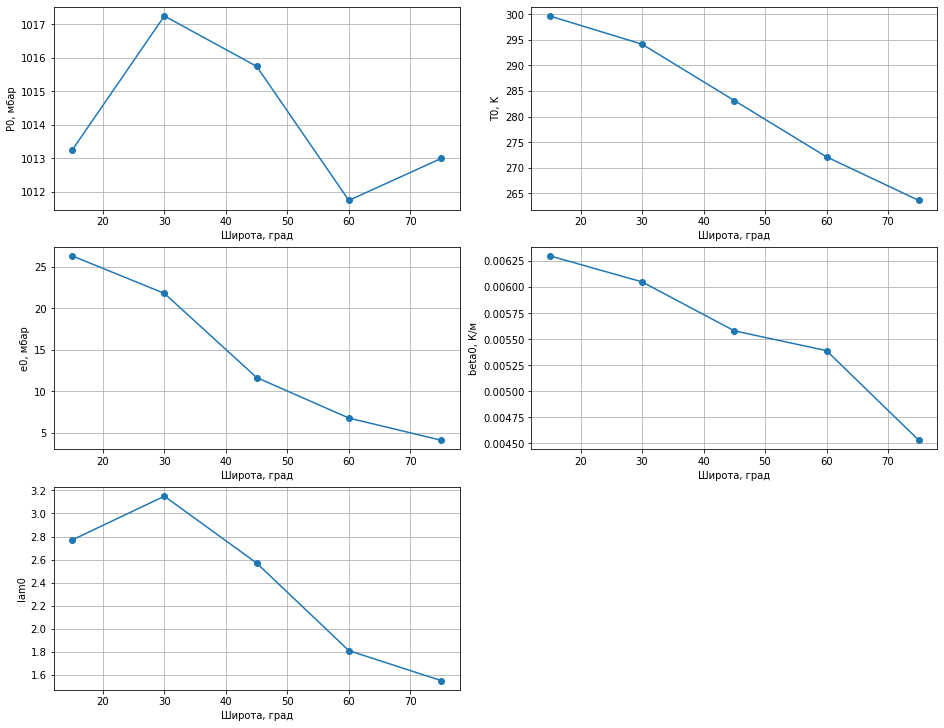

In [34]:
plt.subplots(figsize = (13, 10), constrained_layout=True)

plt.subplot(3, 2, 1)
plt.plot(x, P0_table, 'o-')
plt.xlabel('Широта, град')
plt.ylabel('P0, мбар')
plt.grid()

plt.subplot(3, 2, 2)
plt.plot(x, T0_table, 'o-')
plt.xlabel('Широта, град')
plt.ylabel('T0, K')
plt.grid()

plt.subplot(3, 2, 3)
plt.plot(x, e0_table, 'o-')
plt.xlabel('Широта, град')
plt.ylabel('e0, мбар')
plt.grid()
              
plt.subplot(3, 2, 4)
plt.plot(x, beta0_table, 'o-')
plt.xlabel('Широта, град')
plt.ylabel('beta0, К/м')
plt.grid()

plt.subplot(3, 2, 5)
plt.plot(x, lam0_table, 'o-')
plt.xlabel('Широта, град')
plt.ylabel('lam0')
plt.grid()

plt.show()

In [35]:
P0_interp = scipy.interpolate.interp1d(x, P0_table)
T0_interp = scipy.interpolate.interp1d(x, T0_table)
e0_interp = scipy.interpolate.interp1d(x, e0_table)
beta0_interp = scipy.interpolate.interp1d(x, beta0_table)
lam0_interp = scipy.interpolate.interp1d(x, lam0_table)

In [36]:
# метрологические параметры
P0 = P0_interp(result_B)        # давление, мбар
T0 = T0_interp(result_B)        # температура, К;
e0 = e0_interp(result_B)        # давление насыщенных водяных паров, мбар
beta0 = beta0_interp(result_B)  # зависимость температуры от высоты, К/м
lam0 = lam0_interp(result_B)    # градиент изменения испарения воды

print("P0 =", P0, "T0 =", T0, "e0 =", e0, "beta0 =", beta0, "lam0 =", lam0)

P0 = 1012.590958576076 T0 = 266.4314816826834 e0 = 4.983712481501737 beta0 = 0.004811420499659736 lam0 = 1.635080616176199


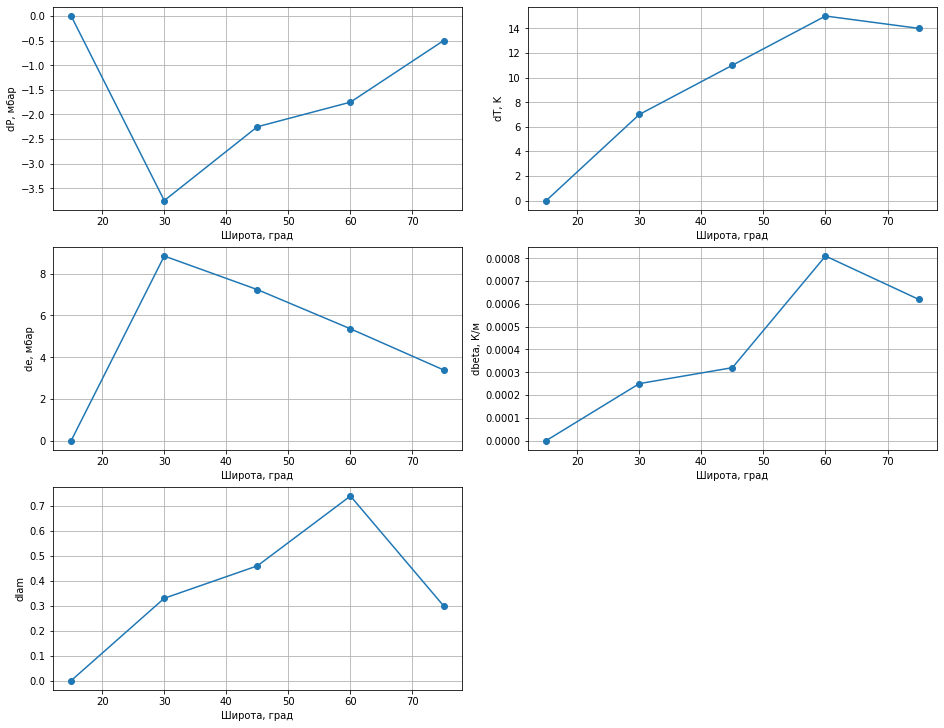

In [37]:
plt.subplots(figsize = (13, 10), constrained_layout=True)

plt.subplot(3, 2, 1)
plt.plot(x, dP_table, 'o-')
plt.xlabel('Широта, град')
plt.ylabel('dP, мбар')
plt.grid()

plt.subplot(3, 2, 2)
plt.plot(x, dT_table, 'o-')
plt.xlabel('Широта, град')
plt.ylabel('dT, K')
plt.grid()

plt.subplot(3, 2, 3)
plt.plot(x, de_table, 'o-')
plt.xlabel('Широта, град')
plt.ylabel('de, мбар')
plt.grid()

plt.subplot(3, 2, 4)
plt.plot(x, dbeta_table, 'o-')
plt.xlabel('Широта, град')
plt.ylabel('dbeta, К/м')
plt.grid()

plt.subplot(3, 2, 5)
plt.plot(x, dlam_table, 'o-')
plt.xlabel('Широта, град')
plt.ylabel('dlam')
plt.grid()

plt.show()

In [38]:
dP_interp = scipy.interpolate.interp1d(x, dP_table)
dT_interp = scipy.interpolate.interp1d(x, dT_table)
de_interp = scipy.interpolate.interp1d(x, de_table)
dbeta_interp = scipy.interpolate.interp1d(x, dbeta_table)
dlam_interp = scipy.interpolate.interp1d(x, dlam_table)

In [39]:
# метрологические сезонные изменения параметров
dP = dP_interp(result_B)
dT = dT_interp(result_B)
de = de_interp(result_B)
dbeta = dbeta_interp(result_B)
dlam = dlam_interp(result_B)
print("dP =", dP, "dT =", dT, "de =", de, "dbeta =", dbeta, "dlam =", dlam)

dP = -0.9090414239240339 dT = 14.327233139139228 de = 4.034649284104278 dbeta = 0.0006821742964364531 dlam = 0.44398258122125994


In [40]:
P = calculateMetParam(P0, dP, D, Dmin)
T = calculateMetParam(T0, dT, D, Dmin)
e = calculateMetParam(e0, de, D, Dmin)
beta = calculateMetParam(beta0, dbeta, D, Dmin)
lam = calculateMetParam(lam0, dlam, D, Dmin)

print("P =", P, "T =", T, "e =", e, "beta =", beta, "lam =", lam)

P = 1012.4363145595408 T = 268.86879732107013 e = 5.670077650550986 beta = 0.004927470407179419 lam = 1.7106099021082983


## 4.5 Вычисление тропосферной задержки 

In [41]:
m_el = tropCorrect(el)
print(m_el)

1.4208275230004017


In [42]:
z_hyd = (1e-6 * k1 * Rd * P) / gm
z_wet = ( (1e-6 * k2 * Rd) / (gm * (lam+1) - beta * Rd) ) * (e / T)

In [43]:
step1 = g / (Rd * beta)
step2 = ( g*(lam+1) / (Rd*beta) ) - 1
print(step1, step2)

6.93318913655 17.79317112672211


In [44]:
d_hyd = mt.pow((1-(beta * H / T)), step1) * z_hyd
d_wet = mt.pow((1-(beta * H / T)), step2) * z_wet
print(d_hyd, d_wet)

2.2472025262320985 0.08628186112034918


In [45]:
dt_trop = -(d_hyd + d_wet) * m_el 
sigma_trop = 0.12 * m_el
print("dt_trop =", dt_trop)
print("sigma_trop =", sigma_trop)

dt_trop = -3.315478842042088
sigma_trop = 0.1704993027600482
